## Image classification with Artificial Neural Networks
### Introduction
Artificial neural networks are modelled after the human brain. The schema below shows a single neuron in the human brain.  
  
![](https://github.com/HOGENT-Databases/DB3-Workshops/blob/master/notebooks/images/neuron.png?raw=1)  
  
**Dendrites** convey electrical signals from **neurons** to the cell body; resultant electrical signals are sent along the axon to other neurons. The human brain has approximately $10^{11}$ neurons. If the electrical signal between two neurons is strong enough the receiving neuron is **activated**.  
  
Frameworks modelling **artificial neural networks** (also called **deep learning frameworks**) generally manipulate data in the form of tensors. A **tensor** is basically a multidimensional array. Frameworks like **TensorFlow** (originated from Google) pack all your data into one or more tensors, which they use to perform the mathematical calculations that enable neural networks to learn. These tensors can become quite large as the number of dimensions increases and as the richness of the data increases (for example, images, audios and videos are richer than text). In (Deitel & Deitel, 2019) several types of tensors are listed, amongst others:  
- **1D tensor**: This is similar to a one-dimensional array and is known as a vector. A 1D tensor might represent a _sequence_, such as hourly temperature readings from a sensor or the words of one movie review. 
- **2D tensor**: This is similar to a two-dimensional array and is known as a matrix.  A 2D tensor could represent a _grayscale image_ in which the tensor’s two dimensions are the image’s width and height in pixels, and the value in each element is the intensity of that pixel. 
- **3D tensor**: This is similar to a three-dimensional array and could be used to represent a _color image_. The first two dimensions would represent the width and height of the image in pixels and the depth at each location might represent the red, green and blue (RGB) components of a given pixel’s color. 
- **4D tensor** could be used to represent one _video_. Each frame in a video is essentially a color image. 
  
### Feed-forward neural networks
Artificial neural networks have a very good reputation for text, image and video classification. Several types of neural networks exist: **feed forward**, **recurrent** and **convolutional**. We will now use the most simple one: a feed forward neural network with some hidden layers and an **activation function** to find out if it offers a better accuracy than random forest in our digit classification example.  
  
A fully connected feed forward neural network with three inputs and one hidden layer looks like in the figure below. In this example we have one output class, which can have a value of 0 or 1.  
  
![](https://github.com/HOGENT-Databases/DB3-Workshops/blob/master/notebooks/images/ffnn.png?raw=1)
  
The tuple $(x1, x2, x3)$ represents the set of inputs. In our digit case we have 784 input values (the number of pixels in a digit image). The class to which the digit belongs is calculated by _propagating_ the input through the hidden layers towards the output classes. In our case we will have 10 output classes (0 – 9). For each digit image in the input exactly one output class will be activated (i.e. get a value of 1), the others will get a value of 0.  
  
The +1’s indicate a **bias input** that always has the value “1”. A bias term is used to adjust the final output matrix as the y-intercept in a line does. For instance, in the classic equation, $y\ =\ mx\ +\ c$, if $c=0$, the line will always pass through 0. Adding the bias term provides more flexibility and better generalization to the Neural Network model.  
  
In the above figure the values of the neurons in the hidden layer can be calculated as follows.  
  
![](https://github.com/HOGENT-Databases/DB3-Workshops/blob/master/notebooks/images/equation.png?raw=1)  
  
The bias input is indicated as $x_0$ to keep all formulas uniform.  
  
Finally, the output can be calculated as: 
  
![](https://github.com/HOGENT-Databases/DB3-Workshops/blob/master/notebooks/images/output.png?raw=1)  
  
The bias unit of the hidden layers is indicated as $a_0^{\left(2\right)}$. As we see **two consecutive layers come with a matrix of weights that need to be determined**. Each matrix corresponds to a particular mapping between the two layers involved.  
  
The activations in each hidden layer are calculated by the first three formulas above (in case of three neurons in the hidden layer). An activation function f is applied. The output class is calculated by the fourth formula (in case of a single output class). Again, an activation function f is used.  
  
This process is the **forward propagation** of the input tuple $x_1,x_2,x_3$.  
  
Some of the **common activation functions** are shown below.  

![](https://github.com/HOGENT-Databases/DB3-Workshops/blob/master/notebooks/images/activation.png?raw=1) 

As illustrated above the calculation of the output class (in our case the digit between 0 and 9) based on the input images is quite simple. **It all comes to calculating the weights $\theta_{ij}$**, which is in fact the purpose of the training phase.  Conceptually we define a **cost or loss function** for our neural network and **minimize the cost function using an optimization algorithm like stochastic gradient descent**. The _gradient_ in gradient descent refers to an error gradient (error = loss). The model with a given set of weights is used to make predictions and the error for those predictions is calculated. The gradient descent algorithm seeks to stepwise change the weights so that the next evaluation reduces the error, meaning the optimization algorithm is navigating down the gradient (or slope) of error. Neural networks require that you choose a loss function when designing and configuring your model (Brownlee, 2019).  
  
When modeling a classification problem where we are interested in mapping input variables to a class label, we can **model the problem as predicting the probability of an example belonging to each class**. In a binary classification problem, there would be two classes, so we may predict the probability of the example belonging to the first class. In the case of multiple-class classification, we can predict a probability for the example belonging to each of the classes.  
  
In the training dataset, the probability of an example belonging to a given class would be 1 or 0, as each sample in the training dataset is a known example from the domain: we know the answer. Therefore, we would **seek a set of model weights that minimize the difference between the model’s predicted probability distribution given the dataset and the distribution of probabilities in the training dataset**. This is called the **cross-entropy**. In the case of regression problems, where a quantity is predicted, it is common to use the mean squared error (MSE) loss function instead.  
  
### Overfitting in feed-forward neural networks
  
A fully connected feed forward neural network requires a lot of weights $\theta_{ij}$ to be calculated. In the case of 3 inputs and a bias unit, 1 hidden layer with 3 neurons and a bias unit and an output layer with one class (see figure above) $4 x 3 + 4 x 1 = 16$ weights have to be calculated.   
  
Due to the large number of $\theta_{ij}$ a neural network may suffer from __overfitting__, as, just like in case of a high degree polynomial regression, a lot of parameters have to be determined. One way to mitigate overfitting is by applying **dropout**, which means **neurons are randomly disabled during training, preventing the learning of features that are too complicated**.  
  
![](https://github.com/HOGENT-Databases/DB3-Workshops/blob/master/notebooks/images/dropout.png?raw=1) 
  
### Digit classification 
  
Let’ s now apply the above theory to our digits classification problem (Koehler, 2019).  
  
**Keras** (Keras: The Python Deep Learning library, 2019), currently the most popular Python library for neural networks, will be used. Keras is built on top of Google’s **Tensorflow** and offers a high-level API.  
  
A Keras neural network consist of the following components:  
   
- A **network** (also called a model). This is a **sequence of layers** containing the neurons used to learn the samples. Each layer’s neurons receive inputs, process them (via an activation function) and produce outputs. The data is fed into the network via an input layer that specifies the dimensions of the sample data. This is followed by hidden layers of neurons that implement the learning and an output layer that produces the predictions. The more layers you stack, the deeper the network, hence the term **deep learning**.  
- A **loss function**. The produces a measure of how well the network predicts the target values. Lower loss values indicate better predictions.  
- An **optimizer**. This attempts to minimize the values produced by the loss function to tune the network to make better predictions.  
  
We start by applying the same data preparation as we used for the Random Forest Classifier.   

In [1]:
import numpy as np

# keras import for the dataset
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

We again have to linearize and normalize the inputs.

In [8]:
# Check if gpu is used (optional)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 227541919708564360
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5202760028764160084
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10174520081969721654
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels = linearize the image to get a 784 (= 28x28) vector
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# normalizing the data to help with the training
# normalized data leads to better models
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


Since the neural networks algorithms require that each output class has either value 0 or 1 we start by converting our single output class with 10 values (0-9) into 10 output classes, one for each digit, that can be either 0 or 1. Thus a '5' will be represented by $[0,0,0,0,0,1,0,0,0,0]$. As we have seen before this technique is called one-hot-encoding. 

In [3]:
# one-hot encoding using keras' numpy-related utilities
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
print(y_train.shape)
print(y_train[0])  # one sample’s categorical data
y_test = to_categorical(y_test)
print(y_test.shape)

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)


We can’t use ```get_dummies()``` here for one-hot-encoding because this only works on a Pandas dataframe and `y_train` is a numpy Series.   
    
We are now ready to build the layers of the neural network in Keras. The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers. Stacking layers is as easy as .add(). The function `Dense()` adds a regular densely (of fully)-connected neural network layer. The first parameter (512 in our example below) is the dimensionality of the output space. Here we choose two hidden layers with each 512 neurons. The output layer has 10 classes because we have 10 digits. For the first hidden layer you also have to specify the input shape to the add() function (784 pixels in our case). By `Activation()` you specify an activation function. You can choose between `elu`, `softmax`, `selu` (Scaled Exponentional Unit), `softplus`, `softsign`, `relu`, `tanh` and `sigmoid`. We choose `sigmoid` for the hidden layers and `softmax` for the output layer. Finally we choose to randomly dropout 20 % of the neurons in the two hidden layers to avoid overfitting. 

In [4]:
# keras imports for building our neural network
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('sigmoid'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

With the compile() method we configure the model for training:

In [5]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

As explained above we use the `cross-entropy` as loss function. With metrics=`['accuracy']` we specify we want to evaluate the accuracy of the model during training and testing. The `adam` optimizer we use is an alternative for stochastic gradient descent (`sgd`). It turns out `adam` gives better results with its default parameters. Probably we could tune `sgd` to produce comparable (or even better) results, but this is outside the scope of this course.  
  
Just like in Scikit-learn we train the model by using the `fit` function. Besides the training set we can also specify a number of **epochs**. The Keras documentation defines an Epoch as **an arbitrary cutoff, generally defined as _one pass over the entire dataset_ , used to separate training into distinct phases, which is useful for logging and periodic evaluation**.  It can be seen as a single iteration towards the minimum of the loss function. 


In [6]:
# training the model and saving metrics in history
model.fit(X_train, y_train,epochs=20,verbose=2)  

Epoch 1/20
1875/1875 - 13s - loss: 0.3692 - accuracy: 0.8865
Epoch 2/20
1875/1875 - 13s - loss: 0.1613 - accuracy: 0.9508
Epoch 3/20
1875/1875 - 13s - loss: 0.1103 - accuracy: 0.9655
Epoch 4/20
1875/1875 - 13s - loss: 0.0834 - accuracy: 0.9736
Epoch 5/20
1875/1875 - 13s - loss: 0.0660 - accuracy: 0.9789
Epoch 6/20
1875/1875 - 14s - loss: 0.0514 - accuracy: 0.9830
Epoch 7/20
1875/1875 - 15s - loss: 0.0432 - accuracy: 0.9856
Epoch 8/20
1875/1875 - 16s - loss: 0.0369 - accuracy: 0.9883
Epoch 9/20
1875/1875 - 12s - loss: 0.0313 - accuracy: 0.9895
Epoch 10/20
1875/1875 - 12s - loss: 0.0272 - accuracy: 0.9910
Epoch 11/20
1875/1875 - 13s - loss: 0.0235 - accuracy: 0.9922
Epoch 12/20
1875/1875 - 14s - loss: 0.0206 - accuracy: 0.9930
Epoch 13/20
1875/1875 - 15s - loss: 0.0176 - accuracy: 0.9940
Epoch 14/20
1875/1875 - 16s - loss: 0.0186 - accuracy: 0.9934
Epoch 15/20
1875/1875 - 20s - loss: 0.0146 - accuracy: 0.9949
Epoch 16/20
1875/1875 - 17s - loss: 0.0155 - accuracy: 0.9945
Epoch 17/20
1875/

De `verbose=2` parameter makes we can see the loss value and the accuracy (on the training set) after each epoch.  
  
We will now save the model as a file for further use. Saving is necessary is you want to deploy the model. Deploying means you are going to use the trained model in a real-life context (like processing of handwritten texts), of course without having to train it again. Models created by Scikit-learn can also be saved as files. For model evaluation saving and loading the model can be left out. 


In [7]:
# saving the model
import os
save_dir = "./"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

Finally we use the saved model for calculating it’s predictive accuracy. 

In [8]:
mnist_model = load_model('keras_mnist.h5')
loss, accuracy = mnist_model.evaluate(X_test, y_test)

print("Test Loss", loss)
print("Test Accuracy", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9822
Test Loss 0.07177436351776123
Test Accuracy 0.982200026512146


It turns out we get an accuracy of over 98 % (as compared to 97% for random forest). In (Wikipedia MNIST database, 2019, https://en.wikipedia.org/wiki/MNIST_database) you find the error rates (which is 100 % minus the accuracy) of some machine learning methods used on the MNIST database.  
  
Our error rate of 1.7 % corresponds to the line “Deep neural network with two layers and without distortion” (1.6 %). Some convolutional neural networks get an impressive error rate of 0.21 %. However, one has to be careful with such results as they can be the result of overfitting the model to the test set. Indeed, in this example the test set is not randomly chosen, but it is fixed (always the same set of 10.000 digits). This means at each trial with a combination of methods and hyperparameters you always use the same training and test set, which in turn makes you automatically fit your parameters to that fixed test set.   
  
Finally, we visualize some incorrectly predicted digits. 

In [9]:
# load the model and create predictions on the test set
model = load_model('keras_mnist.h5')

predictions = model.predict(X_test)
# The first digit should be a 7 (shown as 1. at index 7)
print(y_test[0])

# Check the probabilities returned by predict for first test sample
# The function enumerate() receives and iterable and creates an iterator that, for each element, 
# returns a tuple containing the element's index and value
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    
# Our model believes this digit is a 7 with nearly 100% certainty
# Not all predictions have this level of certainty

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0: 0.0000000075%
1: 0.0000075660%
2: 0.0000008702%
3: 0.0000581731%
4: 0.0000001710%
5: 0.0000000085%
6: 0.0000000000%
7: 99.9998927116%
8: 0.0000000239%
9: 0.0000355957%


- In the following snippet, p is the predicted value array, and e is the expected value array
- NumPy’s argmax() function determines then index of an array’s highest valued element
- Python's built-in `zip` function enables you to iterate over _multiple_ iterables of data at the _same_ time. The function receives as arguments any number of iterables and returns an iterator that produces tuples containing the elements at the same index in each. 

In [10]:
# Locating the Incorrect Predictions
images = X_test.reshape((10000, 28, 28))

incorrect_predicted_images = []
predicted_digits = []
expected_digits = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predicted_images.append(images[i])
        predicted_digits.append(predicted)
        expected_digits.append(expected)

<Figure size 432x288 with 0 Axes>

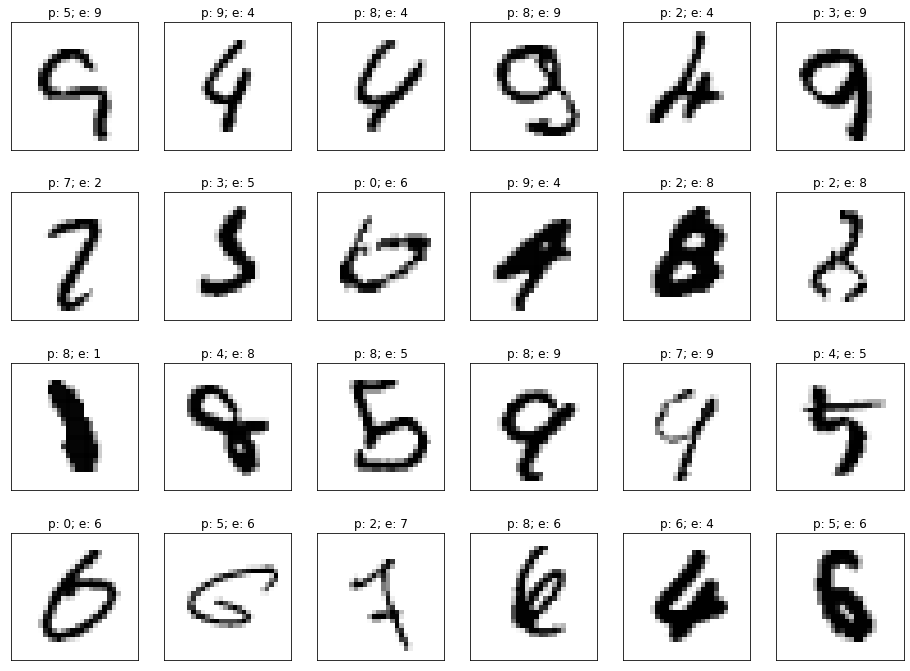

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols=4,6
plt.subplots(nrows,ncols, figsize=(16, 12))

for i in range(nrows*ncols):  # show first 24 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in nrows x ncols table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(incorrect_predicted_images[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(f'p: {predicted_digits[i]}; e: {expected_digits[i]}')
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis